<div style="display: flex; align-items: center;">
    <img src="../img/es_logo.png" alt="title" style="margin-right: 20px;">
    <h1>Introduction to Python</h1>
</div>

#### Exercise 1
create a class called `Point` that takes two parameters `x` and `y` and stores them as attributes. Then create a method called `distance` that takes another `Point` object and calculates the distance between the two points.

Create an appropriate `__str__` method for the class.

In [39]:
class Point:
    def __init__ (self, x, y):
        self.x = x
        self.y = y 
    
    def distance(self, other):
        return ((other.x - self.x)**2 + (other.y - self.y)**2)**0.5

    def __str__(self):
        return f"({self.x},{self.y})"
        
    

point1 = Point(10,5)
point2 = Point(4,2)

distance = Point.distance(point1,point2)

print(f"The distance is {distance}")
print(point1)

The distance is 6.708203932499369
(10,5)


#### Exercise 2
- create a class called `Line` that takes two parameters `point1` and `point2` and stores them as attributes. Then create a method called `length` that calculates the length of the line.
- the `Line` class should also have a method called `slope` that calculates the slope of the line.
- create a method called `point_on_line` that takes a `Point` object and returns `True` if the point is on the line and `False` otherwise.

Create an appropriate `__str__` method for the class.

In [19]:
class Line(Point):
    def __init__ (self, point1, point2):
        self.point1 = point1
        self.point2 = point2 
    
    def length(self):
        return self.point1.distance(self.point2)

    def slope(self):
        if (self.point2.x - self.point1.x) != 0:
            return (self.point2.y - self.point1.y) / (self.point2.x - self.point1.x)
        else:
            return 

    def point_on_line(self, point):
        return Point.distance(self.point1,point) + Point.distance(point,self.point2) == Point.distance(self.point1,self.point2)

    def __str__(self):
        return f"Line ( Point({point1.x},{point1.y}), Point ({point2.x},{point2.y}) )"
         
 
point1 = Point(1,1)
point2 = Point(1,2)

line = Line(point1,point2)
point3 = Point(1,3)
point4 = Point(1, 1.5)

print(line)
print(f"Length: {line.length()}")
print(f"Slope: {line.slope()}")
print(f"Point on line: {line.point_on_line(point3)}")
print(f"Point on line: {line.point_on_line(point4)}")
print(f"Point on line: {line.point_on_line(Point(2,2))}")






Line ( Point(1,1), Point (1,2) )
Length: 1.0
Slope: None
Point on line: False
Point on line: True
Point on line: False


#### Exercise 3
- create a class called `Shape` that takes a list of `Lines` and stores them as an attribute. Then create a method called `perimeter` that calculates the perimeter of the shape.
- the `Shape` class should have a method called `draw` that draws the shape using `matplotlib`. use the function `draw_lines` below to draw the lines.
- create a method called `point_on_perimeter` that takes a `Point` object and returns `True` if the point is on the perimeter of the shape and `False` otherwise.

Create an appropriate `__str__` method for the class.

Perimeter is: 3.414213562373095


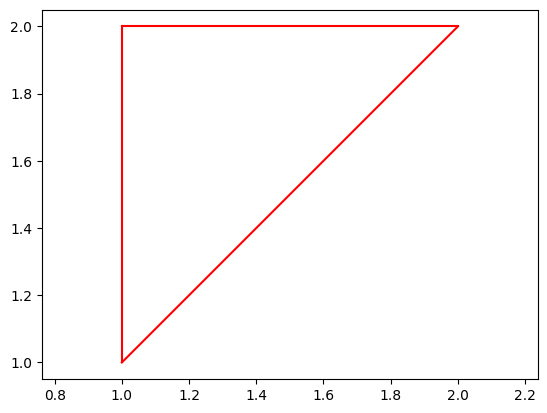

Is the point (3,3) on perimeter? False
Is the point (1,1.5) on perimeter? True
The shape consists of multiple lines


In [49]:
class Shape(Line):
    def __init__ (self, lines):
        self.lines = lines

    def perimeter(self):
        perimeter = 0
        for line in self.lines:
            #per += Point.distance(line.point1,line.point2)
            perimeter += line.length()
        return perimeter
    
    def draw(self, lines, color):
        import matplotlib.pyplot as plt
        for line in lines:
            plt.plot([line.point1.x, line.point2.x], [line.point1.y, line.point2.y], color)
        
        plt.axis('equal')
        plt.show()

    def point_on_perimeter(self, point):
        for line in self.lines:
            if line.point_on_line(point):
                return True
        return False
    
    def __str__(self):
        return f"The shape consists of multiple lines"


lines = [
    Line(Point(1, 1), Point(1, 2)),
    Line(Point(1, 2), Point(2, 2)),
    Line(Point(2, 2), Point(1, 1))
]

shape = Shape(lines)

print(f"Perimeter is: {shape.perimeter()}")

color = "red"
shape.draw(lines, color)

print(f"Is the point {Point(3,3)} on perimeter? {shape.point_on_perimeter(Point(3,3))}")
print(f"Is the point {Point(1,1.5)} on perimeter? {shape.point_on_perimeter(Point(1,1.5))}")

print(shape)


create the following classes:
- `Rectangle` that inherits from `Shape` and takes three parameters `width` and `height` and a Point object `center`. The lines of the rectangle should be calculated using the `width`, `height` and `center` parameters. Then create a method called `area` that calculates the area of the rectangle.
- `Square` that inherits from `Rectangle` and takes two parameter `side` and `center` and stores it as an attribute.
- `Circle` that inherits from `Shape` and takes 3 parameters `radius` and `center` and an optional `num_sides` with a default value of 20. The lines of the circle should be calculated using the `radius`, `center` and `num_sides` parameters. Then create a method called `area` that calculates the area of the circle.
- for the `Circle` class, override the `perimeter` and `point_on_perimeter` methods to work with circles (it should find if point on perimeter in the logical sense rather than the visual representatiobn that uses lines).

Create an appropriate `__str__` method for each one of the classes.

In [70]:
# P.S: please note that I used chatGPT to check how to create the shapes lines 

class Rectangle(Shape):
    def __init__(self, width, height, center):
        self.width = width
        self.height = height 
        self.center = center 
        # self.lines_cal() 
    
    def __str__(self):
        return f"This is a Rectangle!"

        
    def lines_cal(self):
        h_width = self.width / 2
        h_height = self.height / 2
        x = self.center.x
        y = self.center.y

        top_left = Point(x - h_width, y + h_height)
        top_right = Point(x + h_width, y + h_height)
        bottom_left = Point(x - h_width, y - h_height)
        bottom_right = Point(x + h_width, y - h_height)

        self.lines = [
            Line(top_left, top_right),
            Line(top_right, bottom_right),
            Line(bottom_right, bottom_left),
            Line(bottom_left, top_left)
        ]

        return self.perimeter()

    def area(self):
        return self.width * self.height

rectangle = Rectangle(4, 2, Point(0,0))
print(f"Rectangle Perimeter: {rectangle.lines_cal()}")
print(f"Rectangle Area: {rectangle.area()}")


class Square(Rectangle):
    def __init__(self, side, center):
        self.side = side
        self.center = center
        self.width = side
        self.height = side
        # self.calculate_lines()
    
    def __str__(self):
        return f"This is a Square!"

square = Square(3, Point(0,0))
print(f"Square Perimeter: {square.lines_cal()}")
print(f"Square Area: {square.area()}")

""" class Circle(Shape):
    def __init__(self, radius, center, num_sides=20):
        self.radius = radius 
        self.center = center 
        self.num_sides = num_sides 

    import math

    def lines_cal(self):
        pass 

    def area(self):
        return math.pi * self.radius**2
""" 


        

Rectangle Perimeter: 12.0
Rectangle Area: 8
Square Perimeter: 12.0
Square Area: 9


#### Exercise 4
Create a program that simulates a simple employee management system. The program should allow the user to perform the following tasks:
- add a new employee either a Manager or a Developer to the company.
- display the list of employees in the company, along with their details.
- calculate the total salary of all employees in the company.

Create the following classes:
- `Employee` class that takes three parameters `name`, `age` and `salary` and stores them as attributes. 
- `Manager` class that inherits from `Employee` and takes an additional parameter `department` and stores it as an attribute.
- `Developer` class that inherits from `Employee` and takes an additional parameter `programming_language` and stores it as an attribute.

Create a class called `Company` with the following methods:
- `add_employee` that takes an `Employee` object and adds it to the list of employees.
- `display_employees` that displays the list of employees in the company.
- `calculate_total_salary` that calculates the total salary of all employees in the company.

Use user input to allow the user to perform the above tasks.

##### Example Output
```console
Welcome to Estarta Solutions Employee Management System

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Manager
Enter employee name: Ali
Enter employee age: 35
Enter employee salary: 5000
Enter employee department: IT

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 1

Enter employee type (Manager/Developer): Developer
Enter employee name: Sara
Enter employee age: 28
Enter employee salary: 4000
Enter employee programming language: Python

Employee added successfully!

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 2

Ali, a 35 year old Manager in the IT department with a salary of 5000
Sara, a 28 year old Developer in Python with a salary of 4000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 3

Total salary of all employees is 9000

What task would you like to perform?
1. Add a new employee
2. Display employees
3. Calculate total salary
4. Exit

Enter your choice: 4

Thank you for using Estarta Solutions Employee Management System.
Goodbye!
```